In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

dataset=pd.read_csv("train_set.tsv", sep='\t', header=0)
dataset_numpy=dataset.to_numpy()
x=dataset_numpy[:,:-2]
y=dataset_numpy[:,-2:]



In [73]:

scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)





In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(750, 35) (750, 2) (250, 35) (250, 2)


In [91]:
def classificationResults(x_train,x_test,y_train,y_test,model):
    model.fit(x_train,y_train[:,0])
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("Train F1 score: ",f1_score(y_train[:,0],y_pred_train,average='micro'))
    print("Train Precision score: ",precision_score(y_train[:,0],y_pred_train,average='micro'))
    print("Train Recall score: ",recall_score(y_train[:,0],y_pred_train,average='micro'))
    print("Test F1 score: ",f1_score(y_test[:,0],y_pred_test,average='micro'))
    print("Test Precision score: ",precision_score(y_test[:,0],y_pred_test,average='micro'))
    print("Test Recall score: ",recall_score(y_test[:,0],y_pred_test,average='micro'))
    print("\nConfusion Matrix test:")

    cm = confusion_matrix(y_test[:,0], y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()



Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.404
Test Precision score:  0.404
Test Recall score:  0.404

Confusion Matrix test:


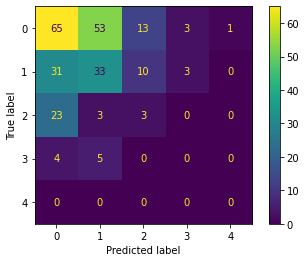

In [92]:

from sklearn import tree
model=tree.DecisionTreeClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

#there is a lot of overfitting because decision trees try to memorize the dataset so i try to use random forest to tackle this problem 

Train F1 score:  1.0
Train Precision score:  1.0
Train Recall score:  1.0
Test F1 score:  0.492
Test Precision score:  0.492
Test Recall score:  0.492

Confusion Matrix test:


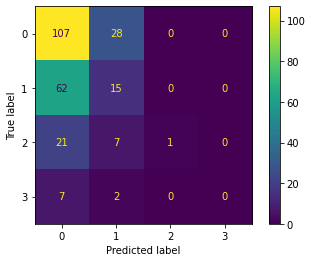

In [93]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)


Train F1 score:  0.5373333333333333
Train Precision score:  0.5373333333333333
Train Recall score:  0.5373333333333333
Test F1 score:  0.5
Test Precision score:  0.5
Test Recall score:  0.5

Confusion Matrix test:


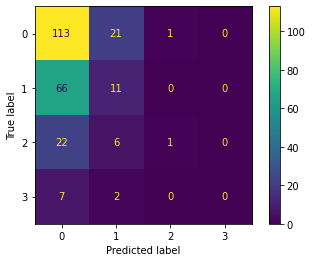

In [94]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
classificationResults(x_train,x_test,y_train,y_test,model)

Train F1 score:  0.5466666666666666
Train Precision score:  0.5466666666666666
Train Recall score:  0.5466666666666666
Test F1 score:  0.452
Test Precision score:  0.452
Test Recall score:  0.452

Confusion Matrix test:


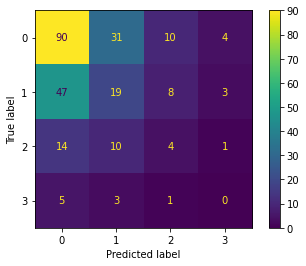

In [95]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
classificationResults(x_train,x_test,y_train,y_test,model)

Train F1 score:  0.6666666666666666
Train Precision score:  0.6666666666666666
Train Recall score:  0.6666666666666666
Test F1 score:  0.516
Test Precision score:  0.516
Test Recall score:  0.516

Confusion Matrix test:


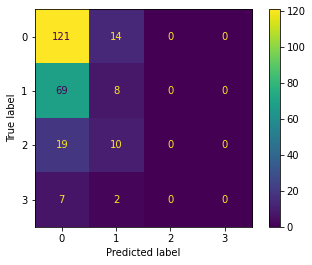

In [96]:
from sklearn import svm
model=svm.SVC()
classificationResults(x_train,x_test,y_train,y_test,model)

Train F1 score:  0.44666666666666666
Train Precision score:  0.44666666666666666
Train Recall score:  0.44666666666666666
Test F1 score:  0.468
Test Precision score:  0.468
Test Recall score:  0.468

Confusion Matrix test:


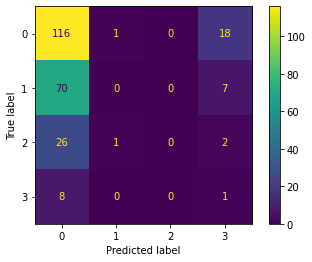

In [97]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

Train F1 score:  0.976
Train Precision score:  0.976
Train Recall score:  0.976
Test F1 score:  0.512
Test Precision score:  0.512
Test Recall score:  0.512

Confusion Matrix test:


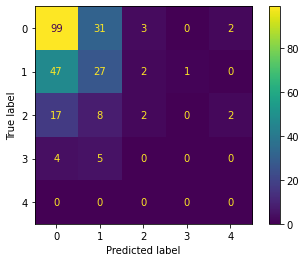

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
classificationResults(x_train,x_test,y_train,y_test,model)

In [135]:
model=tree.DecisionTreeRegressor()
model.fit(x_train,y_train[:,0])

DecisionTreeRegressor()